In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


import warnings
warnings.simplefilter(action='ignore', category=Warning)

# **Reading the dataset**

In [2]:
dataset = pd.read_csv('../input/water-potability/water_potability.csv')

In [3]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
dataset.shape

(3276, 10)

In [5]:
dataset.describe().T.style.bar(
    subset=['max'],
    color='#606ff2').background_gradient(
    subset=['mean'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# **checking the null values**

In [6]:
dataset.isnull().values.any()

True

# **checking the null values for colums**

In [7]:
 dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
dataset[dataset['Sulfate'].isnull()]
dataset[dataset['ph'].isnull()]
dataset[dataset['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


# **replacing the null values with mean**

In [9]:
x = dataset[(dataset['Potability']==0) & (dataset['Hardness']<=150)][['ph']].mean()
x



ph    6.721973
dtype: float64

In [10]:
y = dataset[(dataset['Potability']==0) & (dataset['Hardness']>150)][['ph']].mean()
y

ph    7.112512
dtype: float64

In [11]:
z = dataset[(dataset['Potability']==1) & (dataset['Hardness']<=150)][['ph']].mean()
z

ph    7.098154
dtype: float64

In [12]:
o = dataset[(dataset['Potability']==1) & (dataset['Hardness']>150)][['ph']].mean()
o

ph    7.071429
dtype: float64

In [13]:
#Filling null values of Hardness column
for i in range (0,len(dataset)):
    if (pd.isnull(dataset['ph'][i]) == True):
        if ((dataset['Potability'][i]==0) & (dataset['Hardness'][i]<=150)):
            dataset['ph'][i] = x
        elif ((dataset['Potability'][i]==0) & (dataset['Hardness'][i]>150)):
            dataset['ph'][i] = y
        elif ((dataset['Potability'][i]==1) & (dataset['Hardness'][i]<=150)):
             dataset['ph'][i] = z
        else:
             dataset['ph'][i] = o

# **sulphate missing values repalcing with mean**

In [14]:
x = dataset[(dataset['Potability']==0)][['Sulfate']].mean()
x

Sulfate    334.56429
dtype: float64

In [15]:
y = dataset[(dataset['Potability']==1)][['Sulfate']].mean()
y

Sulfate    332.56699
dtype: float64

In [16]:

#Filling null values of Sulfate column
for i in range (0,len(dataset)):
    if (pd.isnull(dataset['Sulfate'][i]) == True):
        if (dataset['Potability'][i]==0):
            dataset['Sulfate'][i] = x
        else:
             dataset['Sulfate'][i] = y

In [17]:
#Filling null values of Trihalomethanes column
dataset['Trihalomethanes'].fillna(value = dataset['Trihalomethanes'].mean() , inplace = True)

# **checking if there are any null values after removing the null values**

In [18]:
#round off the pH value to one decimal place
dataset['ph'] = dataset['ph'].round(decimals = 1)
dataset["ph"].head()

0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

In [19]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
dataset["Type of Water"] = ""
for i in range(0,len(dataset)):
    if (dataset["ph"][i] > 9):
        dataset["Type of Water"][i] = "Alkaline water"
    elif (dataset["ph"][i] <= 9 and dataset["ph"][i] > 8):
        dataset["Type of Water"][i] = "Bottled waters labeled as alkaline"
    elif (dataset["ph"][i] <= 8 and dataset["ph"][i] > 7.5 ):
        dataset["Type of Water"][i] = "Ocean water"   
    elif(dataset["ph"][i] == 7.5 ):
        dataset["Type of Water"][i] = "Tap water"
    elif(dataset["ph"][i] < 7.5 and dataset["ph"][i] >=6.5):
        dataset["Type of Water"][i] = "Common bottled waters"
    elif(dataset["ph"][i] < 6.5 and dataset["ph"][i] >=5.5):
        dataset["Type of Water"][i] = "Distilled reverse osmosis water"
    else:
        dataset["Type of Water"][i] = "Acidic water"

In [21]:
dataset["Type of Hardness"] = ""
for i in range(0,len(dataset)):
    if (dataset["Hardness"][i] >=0  and dataset["Hardness"][i] < 17.1):
        dataset["Type of Hardness"][i] = "Soft"
    elif (dataset["Hardness"][i] >= 17.1 and dataset["Hardness"][i] < 60):
        dataset["Type of Hardness"][i] = "Slightly hard"
    elif (dataset["Hardness"][i] >= 60 and dataset["Hardness"][i] < 120 ):
        dataset["Type of Hardness"][i] = "Moderately hard"   
    elif(dataset["Hardness"][i] >= 120 and dataset["Hardness"][i] < 180):
        dataset["Type of Hardness"][i] = "Hard"
    else:
         dataset["Type of Hardness"][i] = "Very Hard"

In [22]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Water,Type of Hardness
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Common bottled waters,Very Hard
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,Acidic water,Hard
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,Bottled waters labeled as alkaline,Very Hard
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Bottled waters labeled as alkaline,Very Hard
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Alkaline water,Very Hard


# **Data Visulaization**

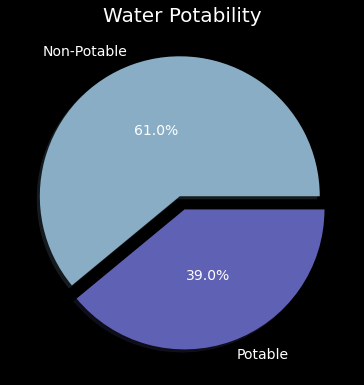

In [23]:
colors = sns.color_palette('twilight')[0:6]
labels = ['Non-Potable', 'Potable']
data = [dataset['Potability'].value_counts()[0],
         dataset['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True,colors=colors)
plt.title("Water Potability", fontsize=20);
plt.show()

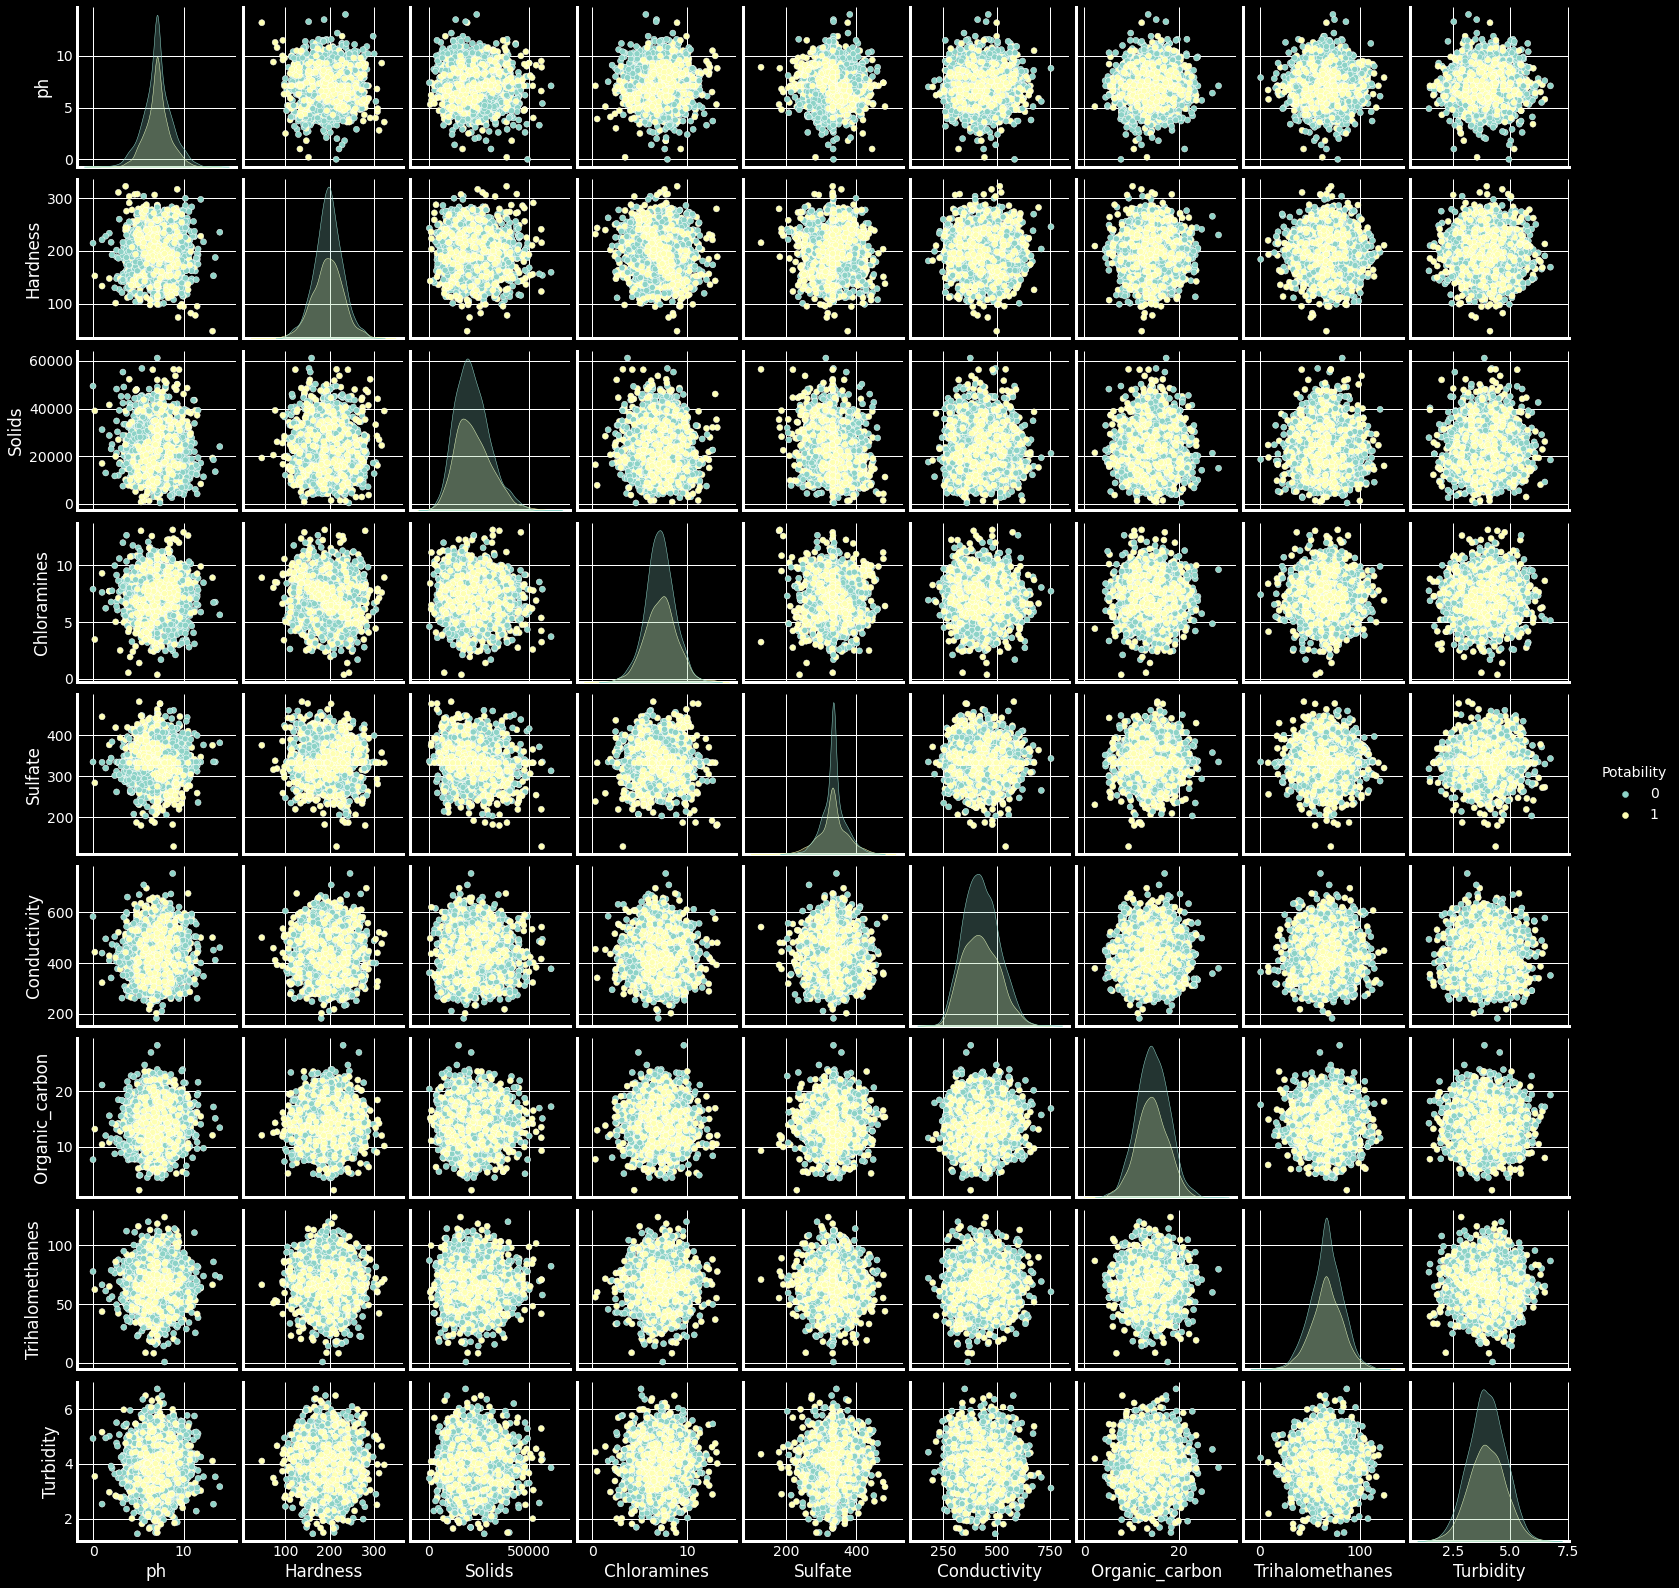

In [24]:
ax = sns.pairplot(dataset, hue="Potability")
plt.show()

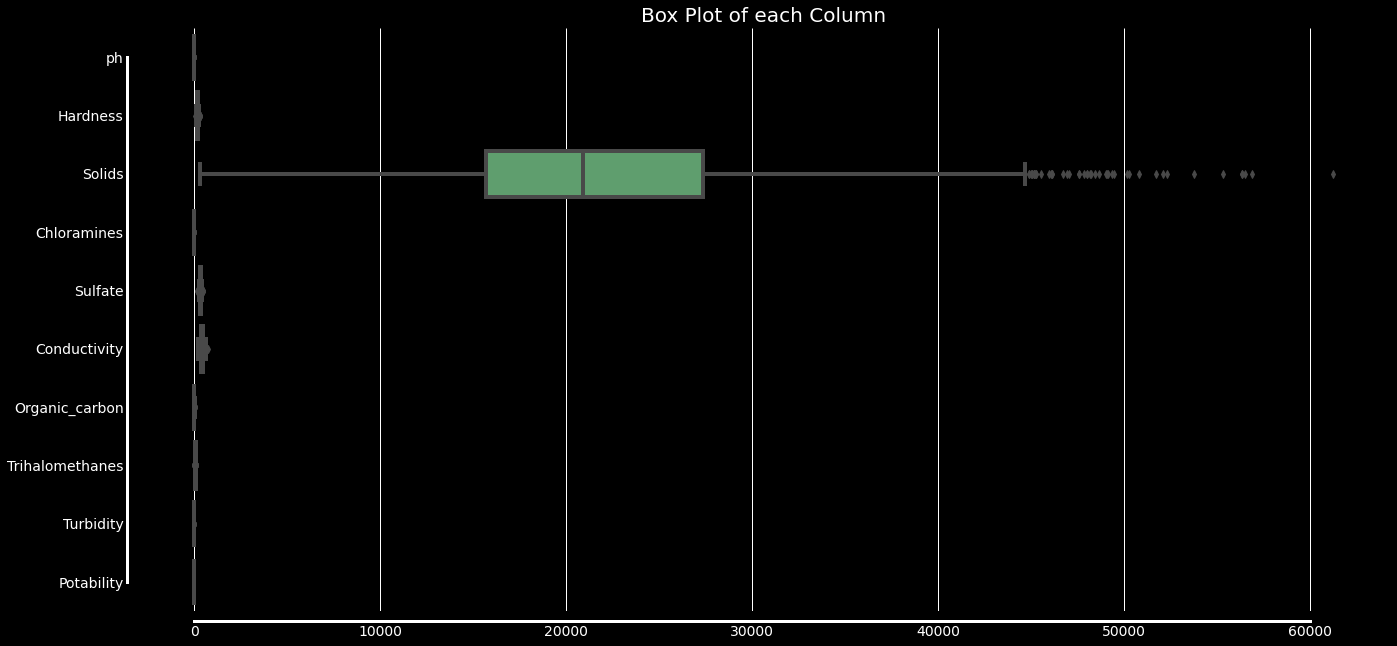

In [25]:
#Box Plot of each Column
fig1, ax = plt.subplots(figsize=[20,10])
ax = sns.boxplot(data=dataset, orient="h",palette = 'deep')
sns.despine(offset=10, trim=True)
plt.title("Box Plot of each Column", fontsize=20);
plt.show()

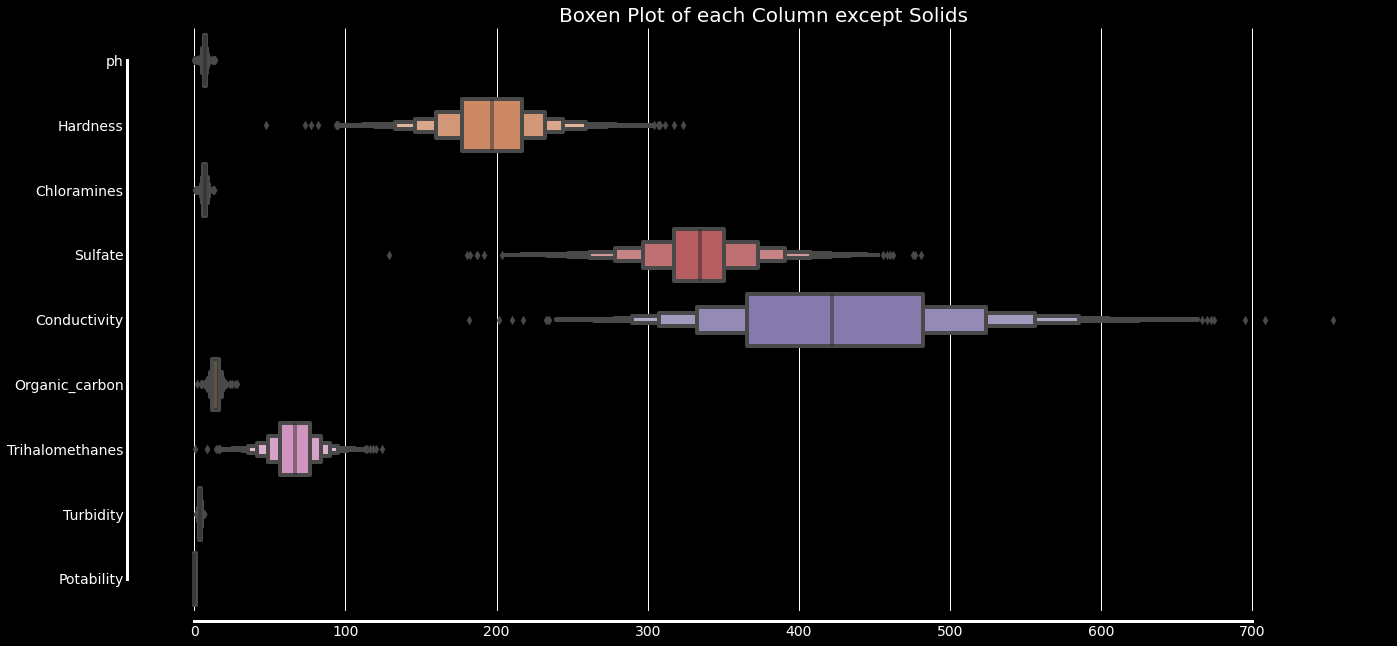

In [26]:
#Boxen Plot of each Column except Solids
dataset1 = pd.DataFrame()
dataset1 = dataset
dataset1 = dataset1.drop("Solids",1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sns.boxenplot(data=dataset1, orient="h", palette='deep')
sns.despine(offset=10, trim=True)
plt.title("Boxen Plot of each Column except Solids", fontsize=20);
plt.show()

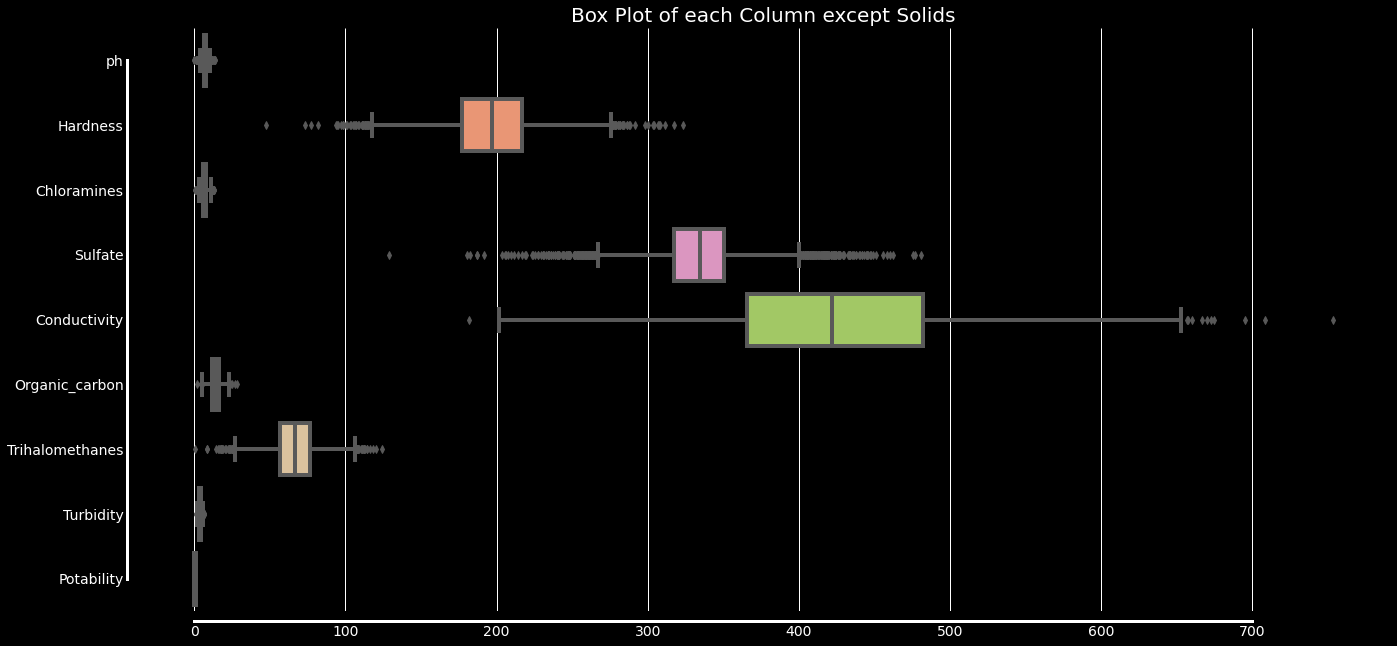

In [27]:
#Box Plot of each Column except Solids
fig1, ax = plt.subplots(figsize=[20,10])
ax = sns.boxplot(data=dataset1, orient="h", palette='Set2')
sns.despine(offset=10, trim=True)
plt.title("Box Plot of each Column except Solids", fontsize=20);
plt.show()

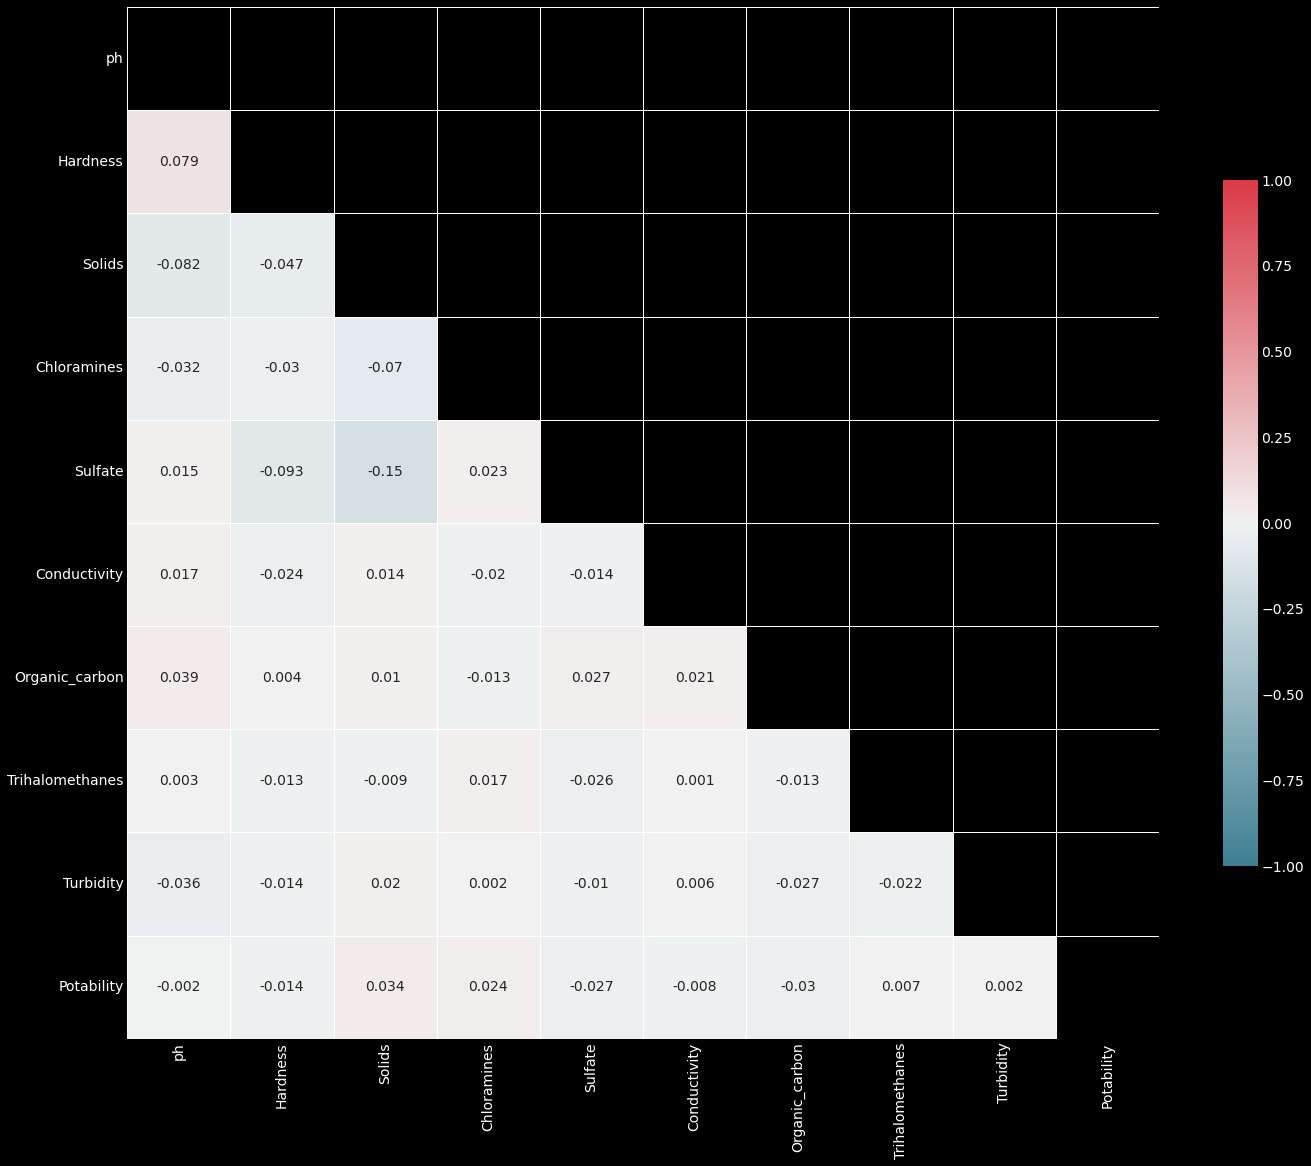

In [28]:
corr = dataset.corr().round(3)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# **bar plot**


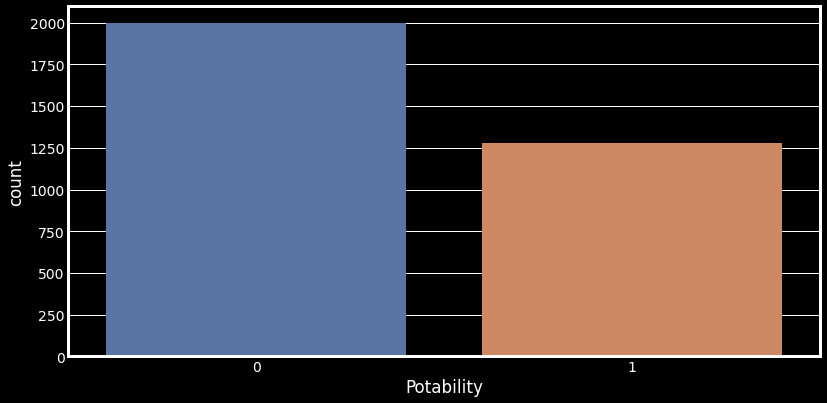

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='deep');

# **Data Visualization**

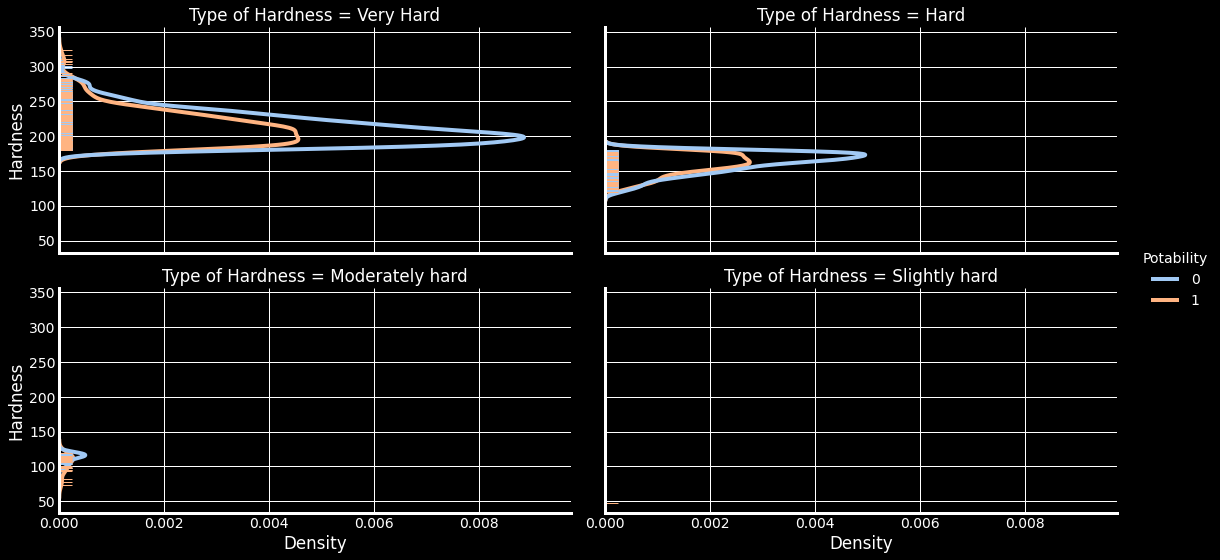

In [30]:
#Relation between Hardness and Potability
g = sns.displot(data=dataset, y="Hardness", hue="Potability", col="Type of Hardness", palette = "pastel",col_wrap=2,kind="kde",height=4,aspect=2,rug=True)

plt.show()

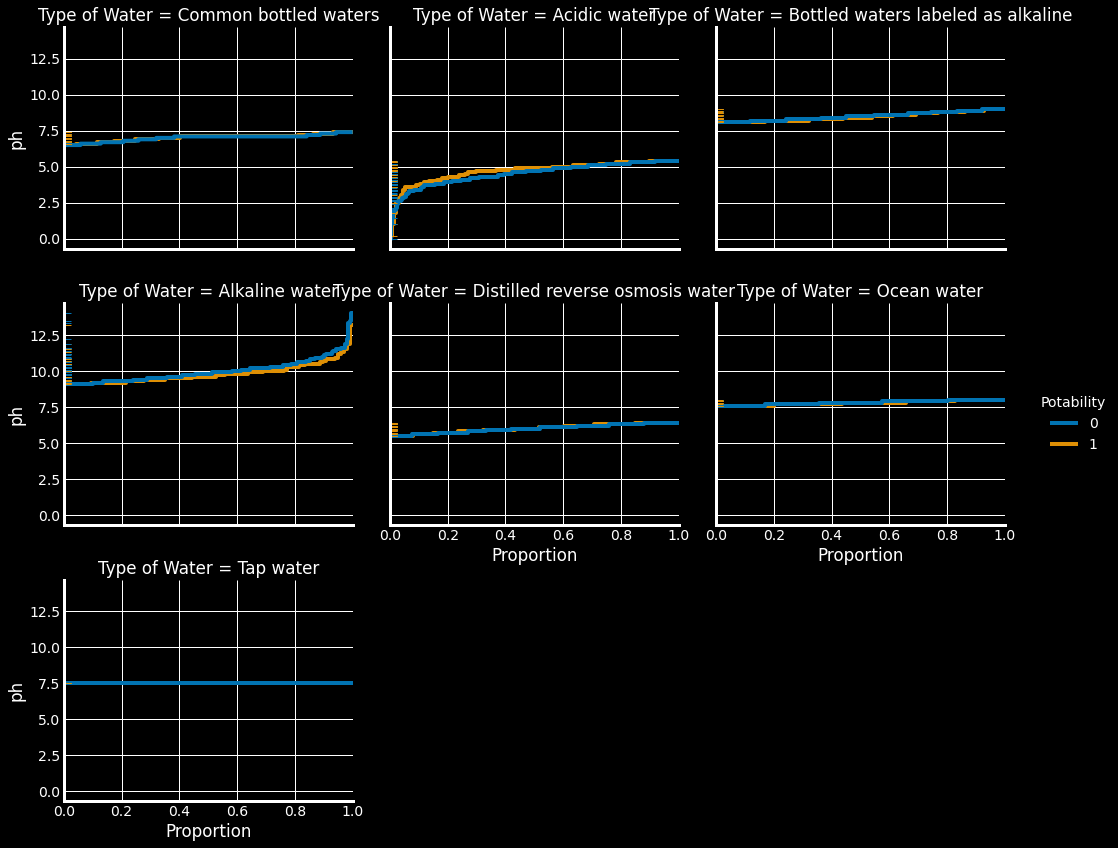

In [31]:
#Relation between ph and Potability
g = sns.displot(data=dataset, y="ph", hue="Potability", col="Type of Water", palette = "colorblind", col_wrap=3,kind="ecdf", height=4, aspect=1.2,rug=True)

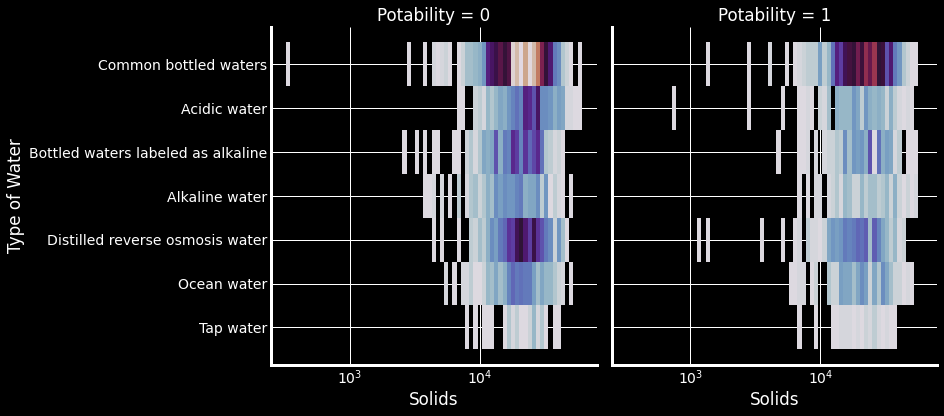

In [32]:
#Relation between Solids and Potability
sns.displot(data=dataset, x="Solids", y="Type of Water", col="Potability",cmap = "twilight",
    log_scale=(True, False), col_wrap=4, height=6, aspect=.95)

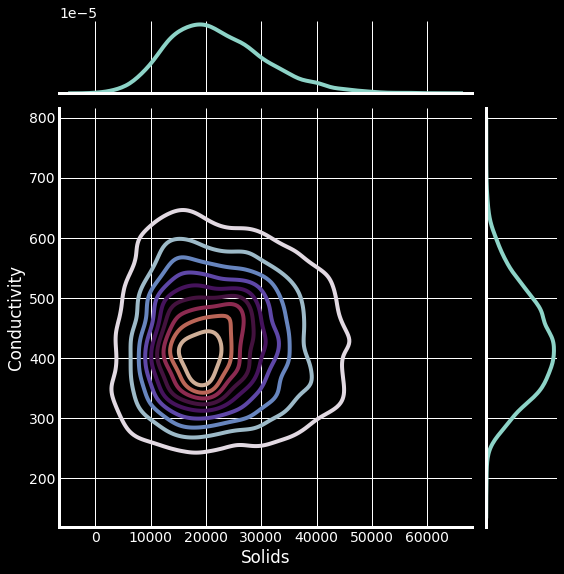

In [33]:
#Relation between Solids and Conductivity
g = sns.jointplot(x="Solids", y="Conductivity", data=dataset, cmap = "twilight",
                 kind="kde",palette =colors, height =8, aspect=0.95)

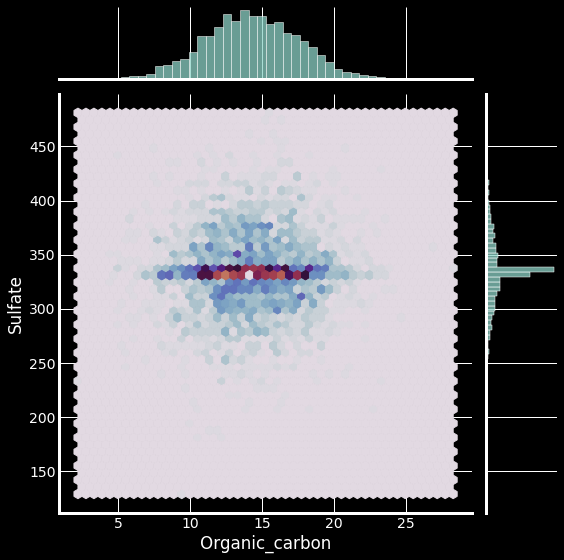

In [34]:
#Relation between Organic_carbon and Sulfate
g = sns.jointplot(x="Organic_carbon", y="Sulfate", data=dataset,
                  kind="hex",cmap ="twilight", height =8)

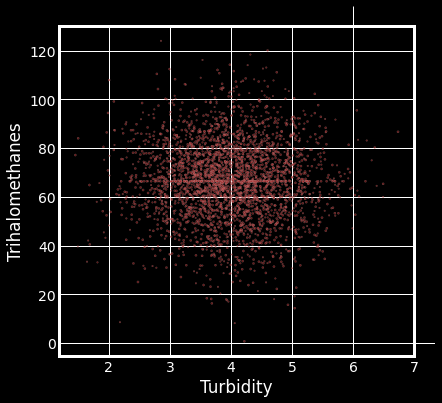

In [35]:
#Relation between Turbidity and Trihalomethanes
g = sns.JointGrid(data=dataset, x="Turbidity", y="Trihalomethanes", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=dataset["Potability"], sizes=(3, 5),
             color="brown", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=15, alpha=1,color="Black")

<AxesSubplot:>

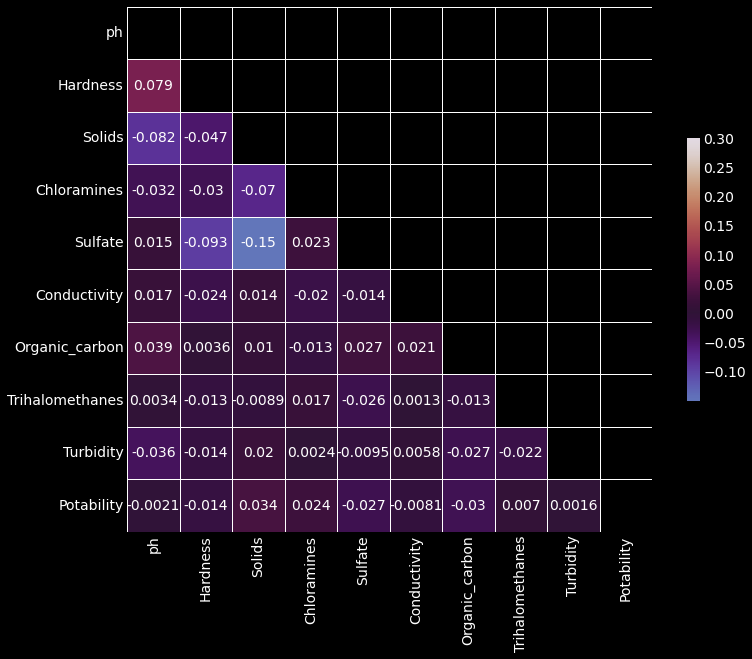

In [36]:
#Annotated Heat Map
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap="twilight", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

# **Data Preprocessing**

In [37]:
#One Hot Encoding of Categorical Columns
data = pd.get_dummies(dataset, columns = ['Type of Water', 'Type of Hardness'])
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Type of Water_Alkaline water,Type of Water_Bottled waters labeled as alkaline,Type of Water_Common bottled waters,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,...,0,0,1,0,0,0,0,0,0,1
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,...,0,0,0,0,0,0,1,0,0,0
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,...,0,1,0,0,0,0,0,0,0,1
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,...,0,1,0,0,0,0,0,0,0,1
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
#Separate Target Column
X = data.drop('Potability',axis=1).values
y = data['Potability'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# This data is imbalanced that we have more Potability -0 than 1. We will oversample in the minority class first. 
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [41]:
from sklearn import metrics

# Creating AUC plot

def model_graphs(model, model_name):
    
    y_pred_prob = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr,tpr,label= model_name +" auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [42]:
# Create confusion matrix to check accuracy, F1 score, and other 

def confusion_matrix_graphs(y_pred):

    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [43]:
# 5 folds validation and check the means accuracy score 

def test_val_score(model):
    model_cross_val_score = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = 5).mean()
    
    print("===========================================================")

    print("The 5 fold cross value score is {:.2f}". format(model_cross_val_score))
    
    print("===========================================================")

# **Building the classifiers**

# **Logistic Regression classifier**

The 5 fold cross value score is 0.60
              precision    recall  f1-score   support

           0       0.53      0.62      0.57       514
           1       0.49      0.39      0.44       469

    accuracy                           0.51       983
   macro avg       0.51      0.51      0.50       983
weighted avg       0.51      0.51      0.51       983



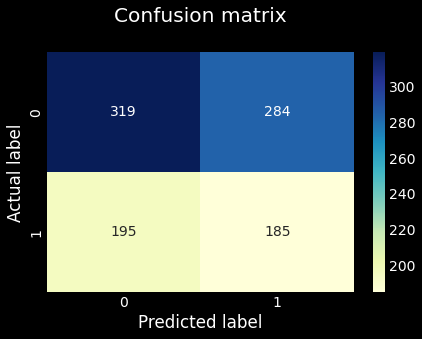

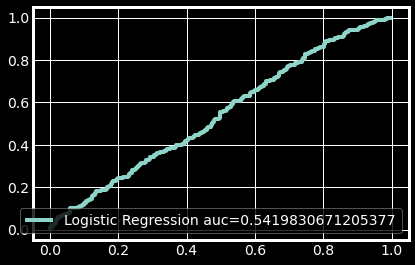

In [44]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

test_val_score(lr)


print(classification_report(y_lr_pred, y_test))

confusion_matrix_graphs(y_lr_pred)
model_graphs(lr, "Logistic Regression")

# **Decision Tree classifier**

The 5 fold cross value score is 0.67
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       573
           1       0.58      0.54      0.56       410

    accuracy                           0.65       983
   macro avg       0.64      0.63      0.63       983
weighted avg       0.64      0.65      0.65       983



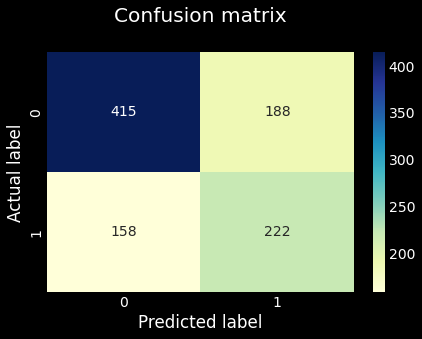

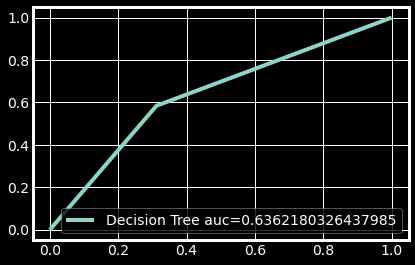

In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

test_val_score(dt)

print(classification_report(y_dt_pred, y_test))
confusion_matrix_graphs(y_dt_pred)
model_graphs(dt, "Decision Tree")

# **Random Forest classifier**

The 5 fold cross value score is 0.72
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       605
           1       0.62      0.63      0.63       378

    accuracy                           0.71       983
   macro avg       0.69      0.70      0.70       983
weighted avg       0.71      0.71      0.71       983



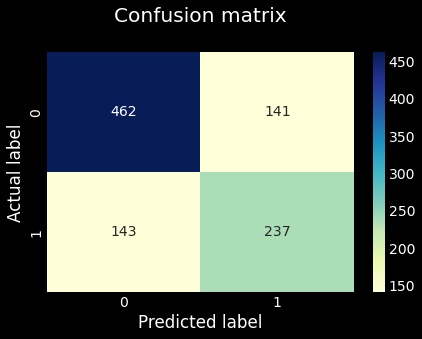

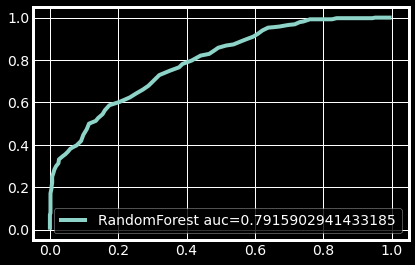

In [46]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

test_val_score(rf)

print(classification_report(y_rf_pred, y_test))
confusion_matrix_graphs(y_rf_pred)
model_graphs(rf, "RandomForest")

# **Navie Bayes classifier**

The 5 fold cross value score is 0.60
              precision    recall  f1-score   support

           0       0.98      0.62      0.76       960
           1       0.03      0.57      0.06        23

    accuracy                           0.62       983
   macro avg       0.51      0.59      0.41       983
weighted avg       0.96      0.62      0.74       983



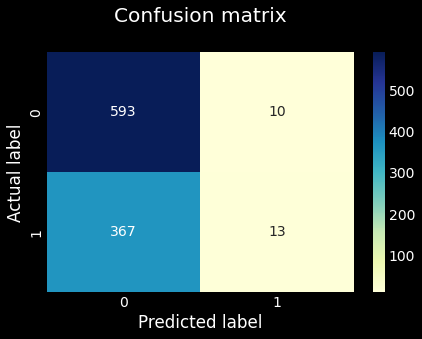

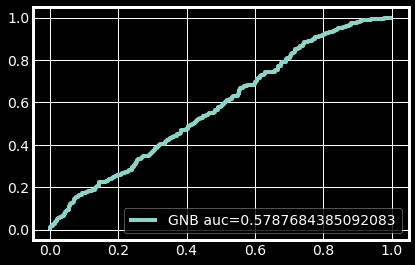

In [47]:
GNB = GaussianNB()
GNB = GNB.fit(X_train, y_train)
y_GNB_pred = GNB.predict(X_test)

test_val_score(GNB)

print(classification_report(y_GNB_pred, y_test))

confusion_matrix_graphs(y_GNB_pred)

model_graphs(GNB, "GNB")

# KNN

The 5 fold cross value score is 0.59
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       528
           1       0.56      0.47      0.51       455

    accuracy                           0.58       983
   macro avg       0.58      0.58      0.57       983
weighted avg       0.58      0.58      0.58       983



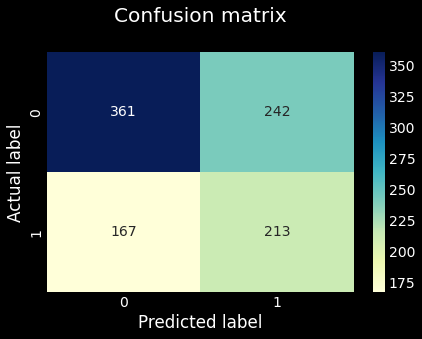

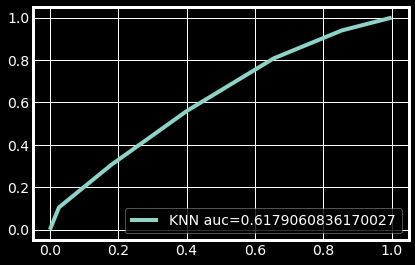

In [48]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
y_knn_pred = KNN.predict(X_test)

test_val_score(KNN)

print(classification_report(y_knn_pred, y_test))

confusion_matrix_graphs(y_knn_pred)

model_graphs(KNN, "KNN")

In [49]:
accuracy_list = {'LogisticRegression': accuracy_score(y_test, y_lr_pred), 
                 'DecisionTreeClassifier': accuracy_score(y_test, y_dt_pred),
                 'RandomForestClassifier':accuracy_score(y_test, y_rf_pred), 
                 'Naive Bayes':accuracy_score(y_test, y_GNB_pred),
                 'KNN':accuracy_score(y_test, y_knn_pred)
                 }
                     
        
print(pd.Series(data=accuracy_list, index=['LogisticRegression', 'DecisionTreeClassifier', 
                                           'RandomForestClassifier', 'Naive Bayes','KNN']))

LogisticRegression        0.512716
DecisionTreeClassifier    0.648016
RandomForestClassifier    0.711089
Naive Bayes               0.616480
KNN                       0.583927
dtype: float64


### **Random Forest Classifier predicts highest (70.4%) than the other classifiers.**